# Set Parameter
- Attention = [None, Luong]
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 100
- N = 100
- Data Length = 100K
- Deduplication

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
character_accuracy = []
sentance_accuracy = []

In [4]:
train_path = "data/unmatching_dedup/Other/data_train.txt"
dev_path = "data/unmatching_dedup/Other/data_test.txt"

src = fields.SourceField()
tgt = fields.TargetField()
max_len = 104
def len_filter(example):
    return len(example.src) <= max_len and len(example.tgt) <= max_len
train = torchtext.data.TabularDataset(
    path=train_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
dev = torchtext.data.TabularDataset(
    path=dev_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
src.build_vocab(train)
tgt.build_vocab(train)
input_vocab = src.vocab
output_vocab = tgt.vocab

weight = torch.ones(len(tgt.vocab))
pad = tgt.vocab.stoi[tgt.pad_token]
loss = Perplexity(weight, pad)
if torch.cuda.is_available():
    loss.cuda()
    
optimizer = "Adam"
hidden_size = 50
bidirectional = True

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


# Prepare dataset

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-03-12 11:03:08,968 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None


None Att


2019-03-12 11:03:57,549 INFO   Finished epoch 1: Train loss: 76.0002, Dev loss: 69.4786, Accuracy(Character): 0.1420, Accuracy(Word): 0.0275
2019-03-12 11:04:46,038 INFO   Finished epoch 2: Train loss: 56.2638, Dev loss: 68.4252, Accuracy(Character): 0.1445, Accuracy(Word): 0.0284
2019-03-12 11:05:34,632 INFO   Finished epoch 3: Train loss: 52.6117, Dev loss: 76.0992, Accuracy(Character): 0.1431, Accuracy(Word): 0.0273
2019-03-12 11:06:23,077 INFO   Finished epoch 4: Train loss: 49.4895, Dev loss: 61.5723, Accuracy(Character): 0.1472, Accuracy(Word): 0.0270
2019-03-12 11:07:11,685 INFO   Finished epoch 5: Train loss: 48.0625, Dev loss: 62.5534, Accuracy(Character): 0.1482, Accuracy(Word): 0.0247
2019-03-12 11:08:00,095 INFO   Finished epoch 6: Train loss: 46.0115, Dev loss: 62.9765, Accuracy(Character): 0.1453, Accuracy(Word): 0.0200
2019-03-12 11:08:48,400 INFO   Finished epoch 7: Train loss: 44.6629, Dev loss: 59.7512, Accuracy(Character): 0.1450, Accuracy(Word): 0.0197
2019-03-12 11

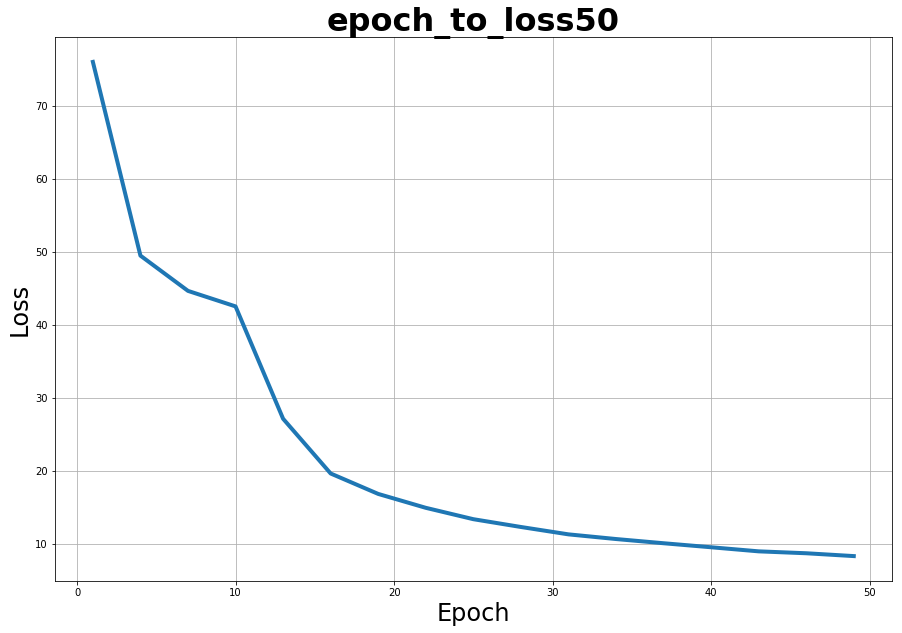

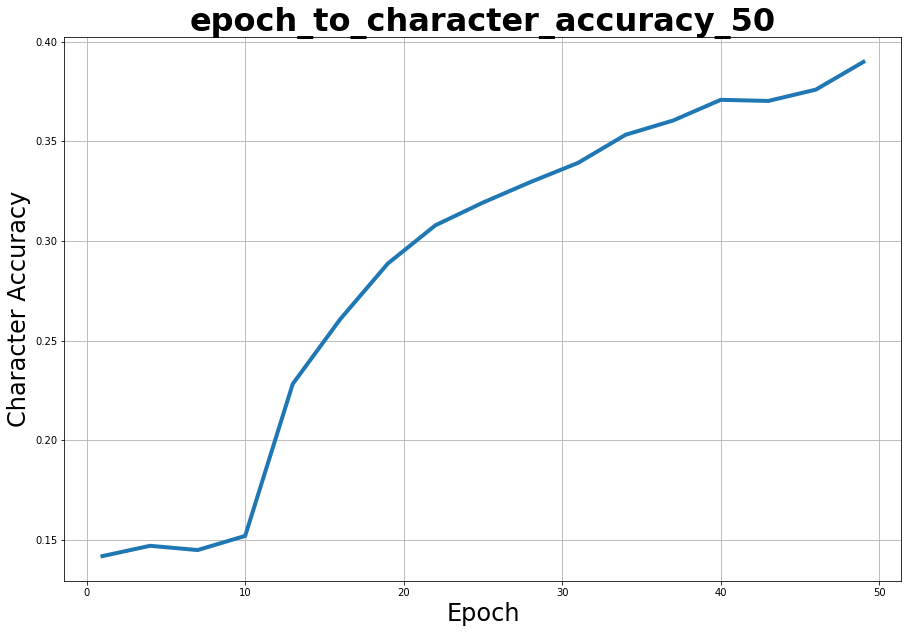

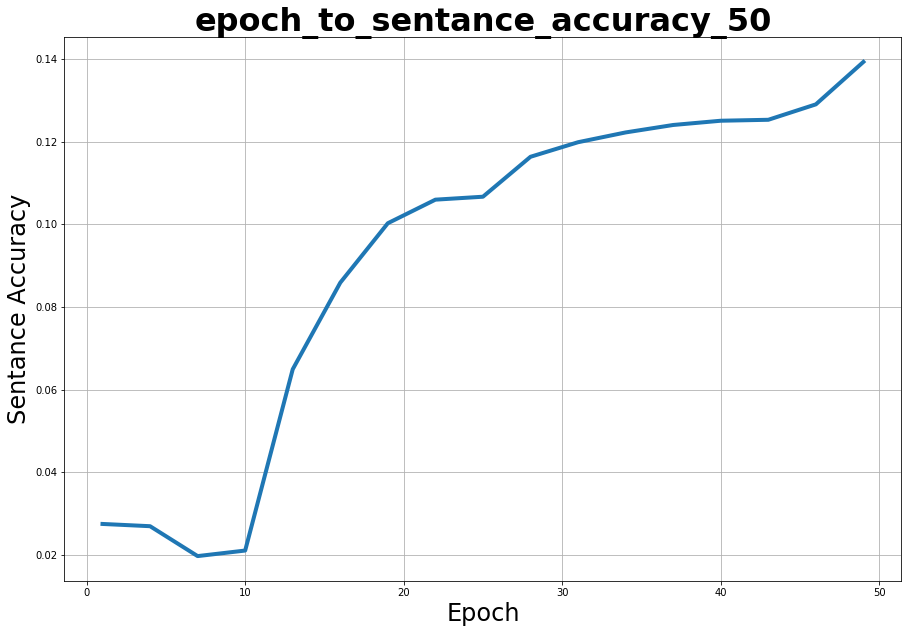

In [5]:
print("None Att")

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                    bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                     dropout_p=0.2, use_attention=None, bidirectional=bidirectional,
                     eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer(loss=loss, batch_size=32,
                      checkpoint_every=50,
                      print_every=100,
                      hidden_size=hidden_size,
                      path="unmatching_dedup_Other_parameter/None_att")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=50, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)

torch.save(seq2seq.state_dict(), 'log/pth/unmatching_dedup_Other_parameter_no_att_model_save.pth')

2019-03-12 11:43:40,910 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None


Luong Att


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-03-12 11:44:37,690 INFO   Finished epoch 1: Train loss: 73.9748, Dev loss: 71.8141, Accuracy(Character): 0.1455, Accuracy(Word): 0.0275
2019-03-12 11:45:35,199 INFO   Finished epoch 2: Train loss: 54.2977, Dev loss: 64.8344, Accuracy(Character): 0.1454, Accuracy(Word): 0.0267
2019-03-12 11:46:32,180 INFO   Finished epoch 3: Train loss: 49.3194, Dev loss: 62.7933, Accuracy(Character): 0.1486, Accuracy(Word): 0.0219
2019-03-12 11:47:29,281 INFO   Finished epoch 4: Train loss: 47.4453, Dev loss: 62.9232, Accuracy(Character): 0.1397, Accuracy(Word): 0.0231
2019-03-12 11:48:26,351 INFO   Finished epoch 5: Train loss: 45.3071, Dev loss: 59.0263, Accuracy(Character): 0.1514, Accuracy(Word): 0.0244
2019-03-12 11:49:23,294 INFO   Finished epoch 6: Train loss: 4

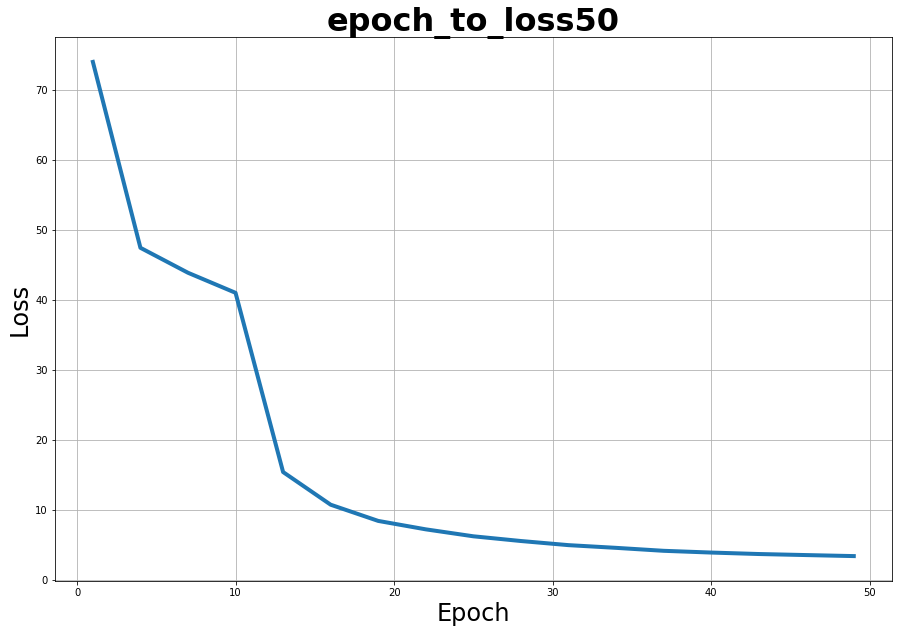

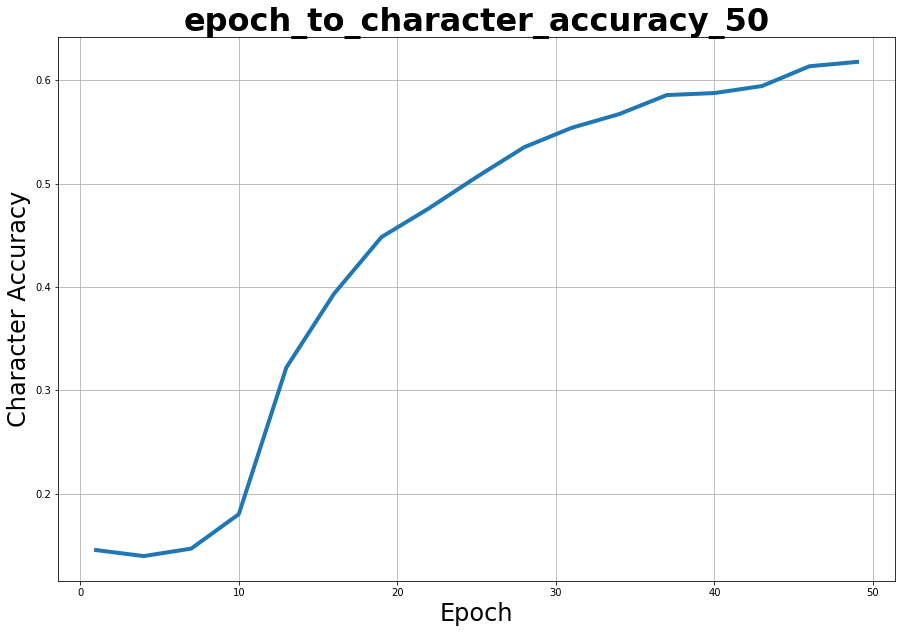

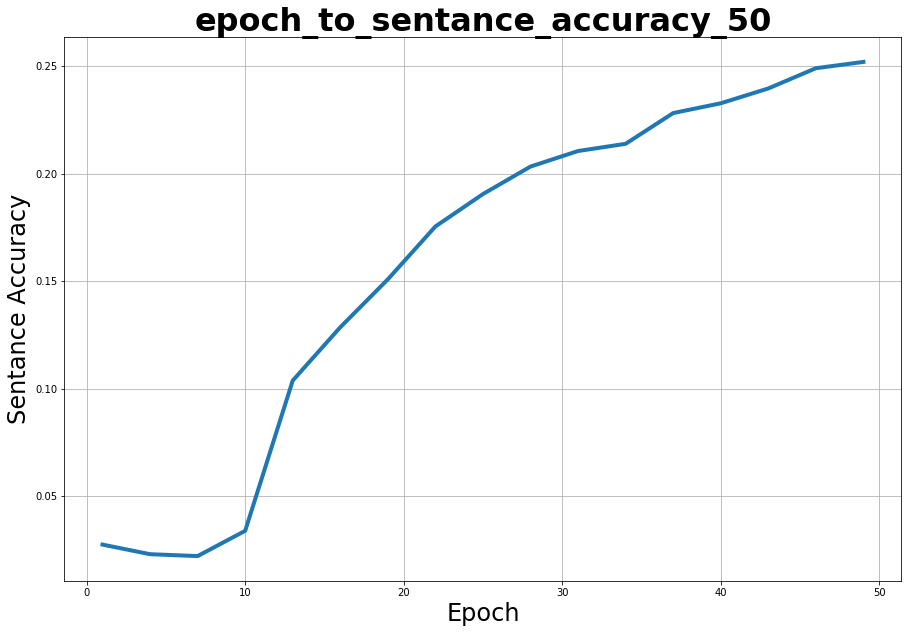

In [6]:
print("Luong Att")

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                    bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                     dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                     eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer(loss=loss, batch_size=32,
                      checkpoint_every=50,
                      print_every=100,
                      hidden_size=hidden_size,
                      path="unmatching_dedup_Other_parameter/Luong_att")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=50, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)

torch.save(seq2seq.state_dict(), 'log/pth/unmatching_dedup_Other_parameter_Luong_att_model_save.pth')

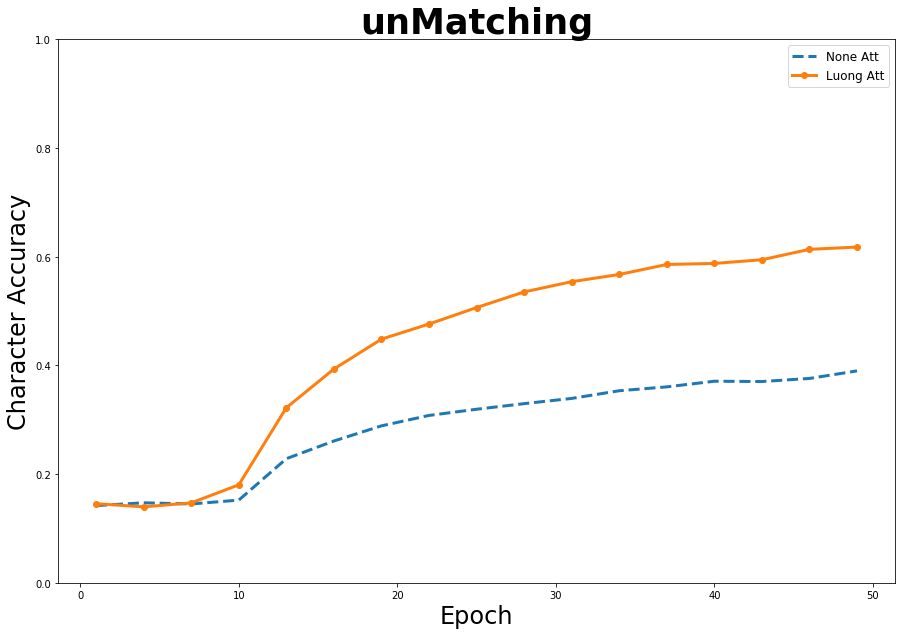

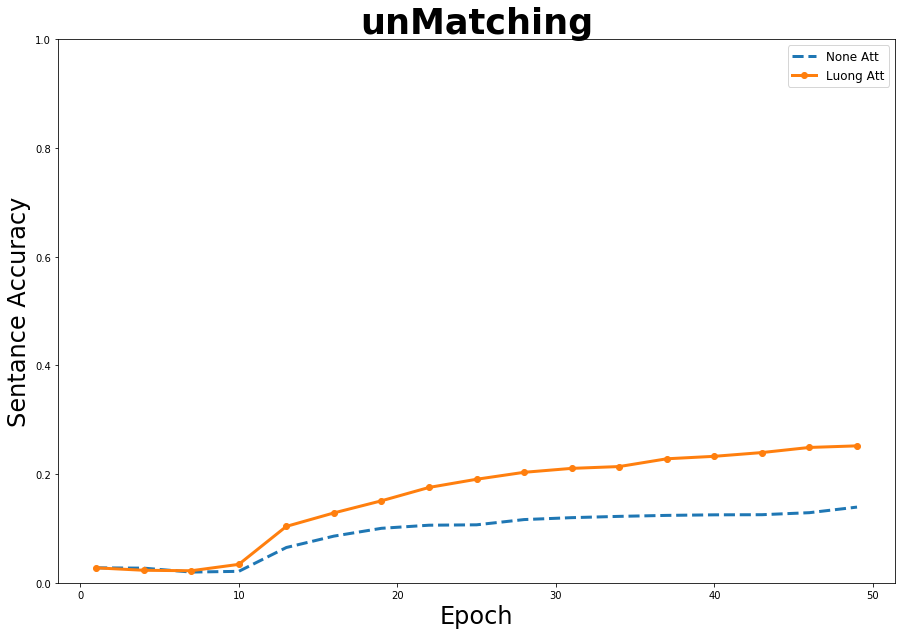

In [10]:
epochs = list(range(1, 51, 1))
plt.figure(figsize=(15,10))
plt.plot(epochs[::3], character_accuracy[0][::3], '--', LineWidth=3, label="None Att")
plt.plot(epochs[::3], character_accuracy[1][::3], '-o', LineWidth=3, label="Luong Att")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Character Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('unMatching', fontsize=35, fontweight=560)
plt.savefig('log/plot/unmatching_dedup_Other_parameter/epoch_to_character_accuracy.png')

plt.figure(figsize=(15,10))
plt.plot(epochs[::3], sentance_accuracy[0][::3], '--', LineWidth=3, label="None Att")
plt.plot(epochs[::3], sentance_accuracy[1][::3], '-o', LineWidth=3, label="Luong Att")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentance Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('unMatching', fontsize=35, fontweight=560)
plt.savefig('log/plot/unmatching_dedup_Other_parameter/epoch_to_sentance_accuracy.png')

In [8]:
print(character_accuracy[0])
print(character_accuracy[1])

[0.1420016031146227, 0.1444978815985343, 0.1430808427802588, 0.1471630596587656, 0.148222260391618, 0.14527081186304822, 0.1450274819649605, 0.15066128478186191, 0.14498454139470973, 0.15212412687507157, 0.1627275850223291, 0.20569964502461927, 0.2283092866139929, 0.24472117256383832, 0.2598763311576778, 0.2608381999312951, 0.2707460208404901, 0.2815555937249513, 0.2887123554334135, 0.29382514599793885, 0.29796747967479675, 0.30787530058399176, 0.3113448986602542, 0.31471716477728157, 0.31928031604259705, 0.32276136493759305, 0.32086625443719224, 0.32958032749341576, 0.33211954654757814, 0.3418269781289362, 0.33919042711553876, 0.34295488377418987, 0.3482394366197183, 0.3532863849765258, 0.3491583648230849, 0.3529571739379366, 0.36044600938967136, 0.35774647887323946, 0.3621063781060346, 0.37081186304820796, 0.37034524218481624, 0.37056280774075345, 0.37024504752089776, 0.375795831901981, 0.3789390816443376, 0.37592179090804995, 0.38652811175999086, 0.38335337226611704, 0.3898202221458

In [9]:
print(sentance_accuracy[0])
print(sentance_accuracy[1])

[0.027514092328325055, 0.028394208000670565, 0.02734645124787829, 0.026969258816873076, 0.024727059365897613, 0.020012153978332392, 0.0197397372226064, 0.02464323882567423, 0.024266046394669012, 0.021080865866180507, 0.02906477232245762, 0.05286980574589803, 0.06491900840300915, 0.07667483916933844, 0.08361098887282328, 0.0858741434588546, 0.09630980071666562, 0.09767188449529557, 0.10024936610716456, 0.10458707906372457, 0.10536241906079084, 0.10594916284235452, 0.10808658661805075, 0.11150227363215356, 0.10666163743425326, 0.11384924875840825, 0.11278053687056012, 0.11632195469499801, 0.11736971144779028, 0.12212652710546719, 0.11984241738438005, 0.12141405251356845, 0.12298568764275686, 0.12221034764569058, 0.12187506548479705, 0.12617086817124537, 0.12401248926049328, 0.1251231114184531, 0.12376102763982313, 0.1250392908782297, 0.1289998114037845, 0.12560507952473754, 0.125269797363844, 0.13692085245489408, 0.1299218373462417, 0.1289998114037845, 0.13660652542905638, 0.134448146518